In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.io as sio

In [32]:
def is_edge_pixel(matrix, i, j, count_corners=False, count_both_mat=False):
    # Get the shape of the matrix
    rows, cols = matrix.shape

    # Check if the pixel is an edge pixel
    if count_both_mat:
        if matrix[i, j] == 1:
            if count_corners:
                # Check the 8 neighbors
                return (
                        i > 0 and matrix[i - 1, j] == 0 or #Above
                        i < rows - 1 and matrix[i + 1, j] == 0 or #below
                        j > 0 and matrix[i, j - 1] == 0 or #Left
                        j < cols - 1 and matrix[i, j + 1] == 0 or #Right
                        i > 0 and j > 0 and matrix[i - 1, j - 1] == 0 or
                        i < rows - 1 and j < cols - 1 and matrix[i + 1, j + 1] == 0 or
                        i > 0 and j < cols - 1 and matrix[i - 1, j + 1] == 0 or
                        i < rows - 1 and j > 0 and matrix[i + 1, j - 1] == 0
                )
            else:
                # Check the 4 neighbors
                return (
                        i > 0 and matrix[i - 1, j] == 0 or
                        i < rows - 1 and matrix[i + 1, j] == 0 or
                        j > 0 and matrix[i, j - 1] == 0 or
                        j < cols - 1 and matrix[i, j + 1] == 0
                )
        elif matrix[i, j] == 0:
            if count_corners:
                # Check the 8 neighbors
                return (
                        i > 0 and matrix[i - 1, j] == 1 or #Above
                        i < rows - 1 and matrix[i + 1, j] == 1 or #below
                        j > 0 and matrix[i, j - 1] == 1 or #Left
                        j < cols - 1 and matrix[i, j + 1] == 1 or #Right
                        i > 0 and j > 0 and matrix[i - 1, j - 1] == 1 or
                        i < rows - 1 and j < cols - 1 and matrix[i + 1, j + 1] == 1 or
                        i > 0 and j < cols - 1 and matrix[i - 1, j + 1] == 1 or
                        i < rows - 1 and j > 0 and matrix[i + 1, j - 1] == 1
                )
            else:
                # Check the 4 neighbors
                return (
                        i > 0 and matrix[i - 1, j] == 1 or
                        i < rows - 1 and matrix[i + 1, j] == 1 or
                        j > 0 and matrix[i, j - 1] == 1 or
                        j < cols - 1 and matrix[i, j + 1] == 1
                )
            return False
    else: #Count only 1's
        if matrix[i, j] == 1:
            if count_corners:
                # Check the 8 neighbors
                return (
                        i > 0 and matrix[i - 1, j] == 0 or
                        i < rows - 1 and matrix[i + 1, j] == 0 or
                        j > 0 and matrix[i, j - 1] == 0 or
                        j < cols - 1 and matrix[i, j + 1] == 0 or
                        i > 0 and j > 0 and matrix[i - 1, j - 1] == 0 or
                        i < rows - 1 and j < cols - 1 and matrix[i + 1, j + 1] == 0 or
                        i > 0 and j < cols - 1 and matrix[i - 1, j + 1] == 0 or
                        i < rows - 1 and j > 0 and matrix[i + 1, j - 1] == 0
                )
            else:
                # Check the 4 neighbors
                return (
                        i > 0 and matrix[i - 1, j] == 0 or
                        i < rows - 1 and matrix[i + 1, j] == 0 or
                        j > 0 and matrix[i, j - 1] == 0 or
                        j < cols - 1 and matrix[i, j + 1] == 0
                )
        else:
            return False

def find_edge_pixels(matrix, count_corners=False, count_both_mat=False):
    """Find the edge pixels in a matrix."""
    # Get the size of the matrix
    n = matrix.shape[0]

    # Initialize an empty list to store the edge pixel locations
    edge_pixels = []

    # Loop over all pixels in the matrix
    for i in range(n):
        for j in range(n):
            # Check if the current pixel is an edge pixel
            if is_edge_pixel(matrix, i, j, count_corners, count_both_mat):
                # If it is, add its location to the list of edge pixel locations
                edge_pixels.append((i, j))

    # Return the list of edge pixel locations
    return edge_pixels

def get_edge_pixels_matrix(matrix, count_corners=False, count_both_mat=False):
    # Create a new matrix filled with zeros
    edge_matrix = np.zeros_like(matrix)

    # Get the edge pixels
    edges = find_edge_pixels(matrix, count_corners, count_both_mat)

    # Set the edge pixels to 1 in the new matrix
    for i, j in edges:
        edge_matrix[i][j] = 1

    return edge_matrix

def flip_edge_pixels(matrix, flip_chance, count_corners=False, count_both_mat=False, seed=None):
    # Set the seed for the random number generator
    random.seed(seed)

    # Get the edge pixels
    edges = find_edge_pixels(matrix, count_corners, count_both_mat)

    # Create a copy of the matrix so we don't modify the original
    new_matrix = matrix.copy()

    # Flip each edge pixel with the given probability
    for i, j in edges:
        if random.random() < flip_chance:
            new_matrix[i, j] = 0 if new_matrix[i, j] == 1 else 1

    return new_matrix

def visualize_matrices(matrix1, matrix2):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust the size as needed

    # Display the first image in the first subplot
    axes[0].imshow(matrix1, cmap='gray_r')
    axes[0].axis('off')

    # Display the second image in the second subplot
    axes[1].imshow(matrix2, cmap='gray_r')
    axes[1].axis('off')


In [3]:
def generate_geometry(size, symmetry, volume_fraction, seed=None):
    if seed is not None:
        np.random.seed(seed)

    if symmetry == 0:
        # Calculate the number of pixels to be filled
        num_pixels = int(round(size * size * volume_fraction))
        # Initialize an array of zeros
        image = np.zeros((size, size))
        # Randomly choose pixels to fill
        fill_indices = np.random.choice(size*size, num_pixels, replace=False)
        image.put(fill_indices, 1)
    elif symmetry == 1:
        half_size = size // 2
        num_pixels = int(round(half_size * size * volume_fraction))
        half_image = np.zeros((size, half_size))
        fill_indices = np.random.choice(half_size*size, num_pixels, replace=False)
        half_image.put(fill_indices, 1)
        # Mirror the half image
        image = np.concatenate((half_image, np.fliplr(half_image)), axis=1)
    elif symmetry == 2:
        quarter_size = size // 2
        num_pixels = int(round(quarter_size * quarter_size * volume_fraction))
        quarter_image = np.zeros((quarter_size, quarter_size))
        fill_indices = np.random.choice(quarter_size*quarter_size, num_pixels, replace=False)
        quarter_image.put(fill_indices, 1)
        # Mirror the quarter image
        half_image = np.concatenate((quarter_image, np.flipud(quarter_image)), axis=0)
        image = np.concatenate((half_image, np.fliplr(half_image)), axis=1)
    else:
        raise ValueError("Symmetry should be 0, 1, or 2.")

    return image

In [38]:
def generate_mutations(image, n, size, symmetry, volume_fraction, flip_chance, count_corners=False, count_both_mat=False, seed=None):
    # Initialize a list to store the matrices
    matrices = []
    matrices.append(image)
    for _ in range(n-1):
        # Flip the edge pixels
        flipped_image = flip_edge_pixels(image, flip_chance, count_corners, count_both_mat, seed)

        # Add the flipped image to the list of matrices
        matrices.append(flipped_image)

    return matrices

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


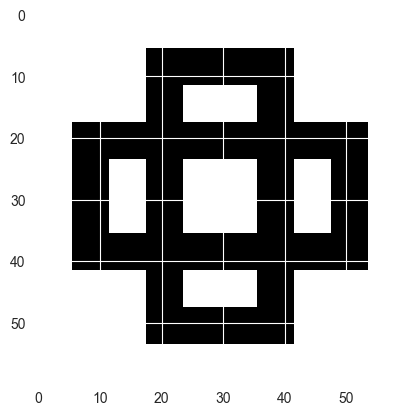

In [78]:
#matrix = generate_geometry(10, 2, 0.75, 1)
matrix = np.array([
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
    [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
    [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
    [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
])
print(matrix)
#plt.imshow(matrix, cmap='gray_r')
scale = 6
scaled_matrix = np.repeat(np.repeat(matrix, scale, axis=0), scale, axis=1)
plt.imshow(scaled_matrix, cmap='gray_r')

[(6, 18), (6, 19), (6, 20), (6, 21), (6, 22), (6, 23), (6, 24), (6, 25), (6, 26), (6, 27), (6, 28), (6, 29), (6, 30), (6, 31), (6, 32), (6, 33), (6, 34), (6, 35), (6, 36), (6, 37), (6, 38), (6, 39), (6, 40), (6, 41), (7, 18), (7, 41), (8, 18), (8, 41), (9, 18), (9, 41), (10, 18), (10, 41), (11, 18), (11, 24), (11, 25), (11, 26), (11, 27), (11, 28), (11, 29), (11, 30), (11, 31), (11, 32), (11, 33), (11, 34), (11, 35), (11, 41), (12, 18), (12, 23), (12, 36), (12, 41), (13, 18), (13, 23), (13, 36), (13, 41), (14, 18), (14, 23), (14, 36), (14, 41), (15, 18), (15, 23), (15, 36), (15, 41), (16, 18), (16, 23), (16, 36), (16, 41), (17, 18), (17, 23), (17, 36), (17, 41), (18, 6), (18, 7), (18, 8), (18, 9), (18, 10), (18, 11), (18, 12), (18, 13), (18, 14), (18, 15), (18, 16), (18, 17), (18, 24), (18, 25), (18, 26), (18, 27), (18, 28), (18, 29), (18, 30), (18, 31), (18, 32), (18, 33), (18, 34), (18, 35), (18, 42), (18, 43), (18, 44), (18, 45), (18, 46), (18, 47), (18, 48), (18, 49), (18, 50), (18

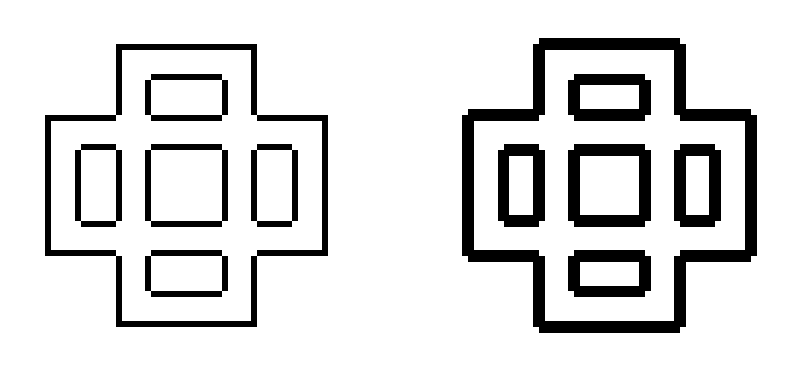

In [79]:
print(find_edge_pixels(scaled_matrix))
edge_matrix = get_edge_pixels_matrix(scaled_matrix, count_corners=False, count_both_mat=False)
edge_matrix_both_mat = get_edge_pixels_matrix(scaled_matrix, count_corners=False, count_both_mat=True)
#visualize_matrices(scaled_matrix, edge_matrix)
visualize_matrices(edge_matrix, edge_matrix_both_mat)

1296 1291


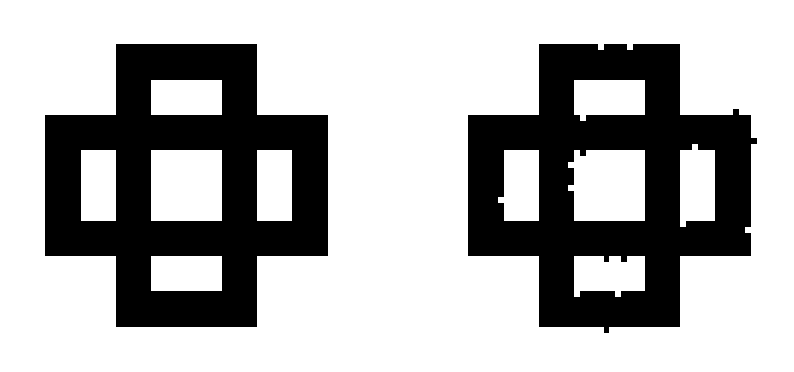

In [80]:
# Flip the edge pixels with a 50% chance
error_matrix = flip_edge_pixels(scaled_matrix,
                                flip_chance=.02,
                                count_corners=False,
                                count_both_mat=True,
                                seed=0)

# Display the original and flipped images side by side
visualize_matrices(scaled_matrix, error_matrix)
print(np.sum(scaled_matrix==1), np.sum(error_matrix==1))

In [81]:
# Generate 100 matrices
matrices = generate_mutations(
    #image=matrix,
    image=scaled_matrix,
    n=100,
    size=10,
    symmetry=2,
    volume_fraction=0.5,
    flip_chance=0.05,
    count_corners=False,
    count_both_mat=True,
    seed=None
)

# Convert the list of matrices to a 3D numpy array
matrices_array = np.array(matrices)
print(matrices_array.shape)
print(type(matrices_array[0][0]))
# Export the array to a MATLAB .mat file
sio.savemat('error_geometries_60px_5%.mat', {'error_geometries': matrices_array})

(100, 60, 60)
<class 'numpy.ndarray'>


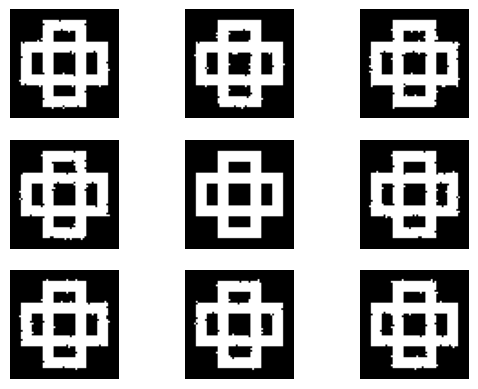

In [82]:
fig, axs = plt.subplots(3, 3)

# Plot the original image in the center
axs[1, 1].imshow(matrices_array[0], cmap='gray')
#axs[1, 1].set_title("Original")

# Remove axis for the original image
axs[1, 1].axis('off')

# Get 8 random samples from the matrices
samples = random.sample(list(matrices_array), 8)

# Loop over the subplots and add the images
for i, ax in enumerate(axs.flat):
    # Skip the center subplot
    if i != 4:
        # Adjust the index for samples when i is greater than or equal to 4
        sample_index = i if i < 4 else i - 1

        # Display the image
        ax.imshow(samples[sample_index], cmap='gray')

        # Remove the axes
        ax.axis('off')

# Show the plot
plt.show()

In [11]:
# Initialize an empty list to store the scaled matrices
scaled_matrices = []

# Generate scaled matrices for scaling factors from 1 to 10
for scale_factor in range(1, 11):
    # Scale the matrix
    scaled_matrix = np.repeat(np.repeat(matrix, scale_factor, axis=0), scale_factor, axis=1)

    # Add the scaled matrix to the list
    scaled_matrices.append(scaled_matrix)

# Save the list of scaled matrices to a .mat file
sio.savemat('scaled_matrices.mat', {'scaled_matrices': scaled_matrices})

C:\Users\zhang\AppData\Roaming\Python\Python39\site-packages\scipy\io\matlab\_mio5.py:493: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  narr = np.asanyarray(source)
